<hr/>

# EN.520.637 Foundations of Reinforcement Learning

<hr/>

<h1><font color="darkblue">Lab 4: Multi-armed Bandit and Monte Carlo Method (60 points)  </font></h1>





##  Content
1. Multi-armed Bandit
2. Monte Carlo Method


In [6]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Problem Statement [P 21, Ch 2.3, Sutton]

#### Define a 10-armed bandit problem in which the action values $q_*(a)$, $a = 1,...,10$, are samples from a standard norm distribution, i.e. Gaussian distribution with mean $= 0$ and variance $ = 1$. Then, when selected $A_t$ at time step $t$, the actual reward, $R_t$ is selected from a Gaussian distribution with mean = $q_*(A_t)$ and variance = 1.

## Problem 1.  Greedy and $\epsilon$-greedy algorithm (15 points)

1. Implement a function/functions that run this game 2000 times with $\epsilon$-greedy algorithm. Your function/functions should take $\epsilon$ as one of the inputs and output:
<br>   (a) average reward at each time step
<br>   (b) percentage of optimal action at each time step. (optimal action is defined by $a^* = arg\underset{a}max           \, q^*(a)$ )
2. Call your function/functions to generate the average reward and percentage of optimal action at each time step with:
<br>   (a) Greedy-algorithm
<br>   (b) $\epsilon$-greedy algorithm, $\epsilon=0.01$
<br>   (c) $\epsilon$-greedy algorithm, $\epsilon=0.1$.
3. Plot the average reward and percentage of optimal action of those three cases and compare with [P 23 Fig 2.2 Sutton].

### 1.

In [ ]:
def e_greedy(list_q, epsilon):
  opt_arm = np.argmax(list_q)
  avg_rewards, opt_actions = np.zeros(shape=(2000, 1000)), np.zeros(shape=(2000, 1000))

  #Repeat the game for 2000 independent runs
  for i in range(2000):
    total_opt_arm, total_reward = 0, 0
    list_Q, list_N = np.zeros(10), np.zeros(10)
    #Measure over 1000 steps
    for j in range(1000):
      #Exploitation
      if np.random.random() > epsilon:
        num_max = np.argwhere(list_Q == list_Q.max()).flatten()
        #if only one max
        if len(num_max) == 1:
          tmp_arm = num_max[0]
        else:
          tmp_arm = np.random.choice(num_max)
      #Exploration
      else:
        tmp_arm = np.random.randint(10)

      reward = np.random.normal(list_q[tmp_arm], 1, 1)[0]
      list_N[tmp_arm] += 1
      list_Q[tmp_arm] += (reward - list_Q[tmp_arm]) / list_N[tmp_arm]

      total_reward += reward
      if tmp_arm == opt_arm:
        total_opt_arm += 1
      avg_rewards[i][j] = reward
      # avg_rewards[i][j] = total_reward/(j+1)
      opt_actions[i][j] = total_opt_arm/(j+1)

  avg_rewards = avg_rewards.mean(axis = 0)
  opt_actions = opt_actions.mean(axis = 0)

  return avg_rewards, opt_actions

### 2.

In [ ]:
list_q = np.random.normal(0, 1, 10)

avg_rewards_a, opt_actions_a = e_greedy(list_q, 0)
avg_rewards_b, opt_actions_b = e_greedy(list_q, 0.01)
avg_rewards_c, opt_actions_c = e_greedy(list_q, 0.1)

### 3.

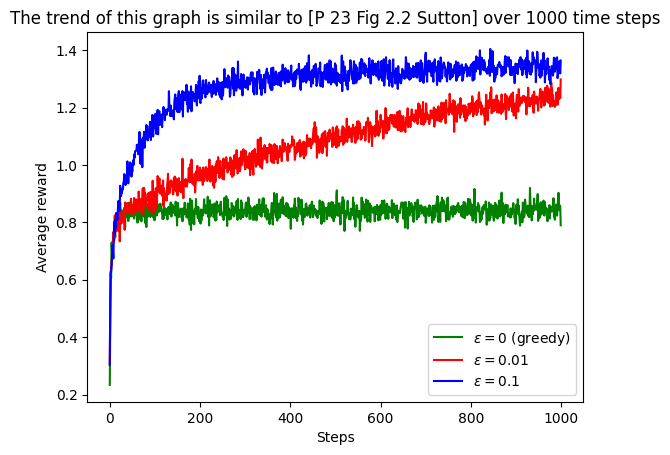

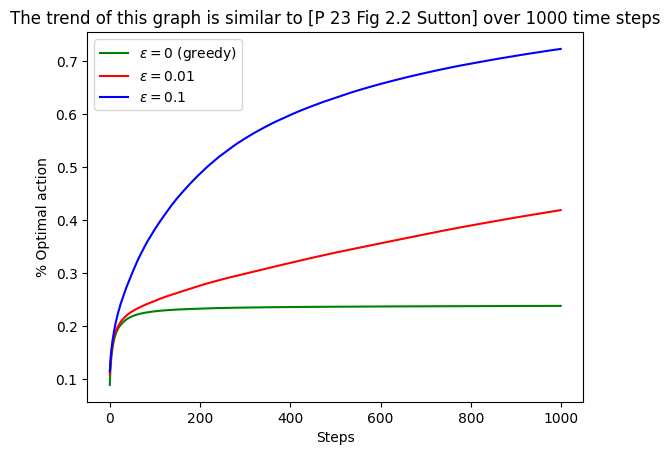

In [ ]:
steps = np.arange(1000)
plt.plot(steps, avg_rewards_a, label = "$\epsilon=0$ (greedy)", color = "green")
plt.plot(steps, avg_rewards_b, label = "$\epsilon=0.01$", color = "red")
plt.plot(steps, avg_rewards_c, label ="$\epsilon=0.1$", color = "blue")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.title("The trend of this graph is similar to [P 23 Fig 2.2 Sutton] over 1000 time steps")
plt.legend()
plt.show()

plt.plot(steps, opt_actions_a, label = "$\epsilon=0$ (greedy)", color = "green")
plt.plot(steps, opt_actions_b, label = "$\epsilon=0.01$", color = "red")
plt.plot(steps, opt_actions_c, label = "$\epsilon=0.1$", color = "blue")
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.title("The trend of this graph is similar to [P 23 Fig 2.2 Sutton] over 1000 time steps")
plt.legend()
plt.show()

## Problem 2.  UCB Action Selection (15 points)

1. Implement a function/functions that run this game 2000 times with UCB Action Selection algorithm. Your function/functions should take $c$ as one of the inputs and output:
<br>   - average reward at each time step.
2. Call your function/functions to generate the average reward at each time step with:
<br>   - UCB Action Selection algorithm, $c = 2$.
3. Plot the average reward of 2.2 and 1.2c, then compare with [P 28 Fig 2.4 Sutton].

### 1.

In [ ]:
def ucb(list_q, c):
  opt_arm = np.argmax(list_q)
  avg_rewards, opt_actions = np.zeros(shape=(2000, 1000)), np.zeros(shape=(2000, 1000))

  #Repeat the game for 2000 independent runs
  for i in range(2000):
    total_opt_arm, total_reward = 0, 0
    list_Q, list_N = np.zeros(10), np.zeros(10)
    #Measure over 1000 steps
    for j in range(1000):
      zero_idx = np.where(list_N == 0)[0]
      if len(zero_idx) > 0:
        tmp_arm = zero_idx[0]
      else:
        tmp_arm = np.argmax(list_Q + c * np.sqrt(np.log(j+1)/list_N))

      reward = np.random.normal(list_q[tmp_arm], 1, 1)[0]
      list_N[tmp_arm] += 1
      list_Q[tmp_arm] += (reward - list_Q[tmp_arm]) / list_N[tmp_arm]

      total_reward += reward
      if tmp_arm == opt_arm:
        total_opt_arm += 1
      avg_rewards[i][j] = reward
      # avg_rewards[i][j] = total_reward/(j+1)
      opt_actions[i][j] = total_opt_arm/(j+1)

  avg_rewards = avg_rewards.mean(axis = 0)
  opt_actions = opt_actions.mean(axis = 0)

  return avg_rewards, opt_actions


### 2.

In [ ]:
avg_rewards_ucb, _ = ucb(list_q, 2)

### 3.

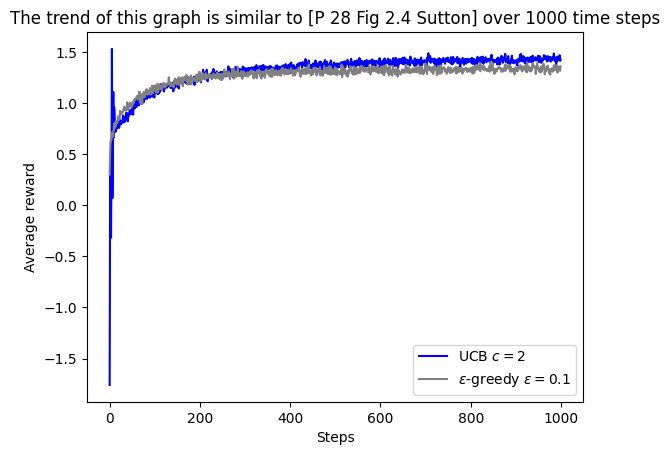

In [ ]:
steps = np.arange(1000)
plt.plot(steps, avg_rewards_ucb, label ="UCB $c=2$", color = "blue")
plt.plot(steps, avg_rewards_c, label = "$\epsilon$-greedy $\epsilon=0.1$", color = "gray")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.title("The trend of this graph is similar to [P 28 Fig 2.4 Sutton] over 1000 time steps")
plt.legend()
plt.show()

## 3. Monte Carlo Method  (CartPole-v1 environment) (30 points)

### 3.1 CartPole Introduction

We now apply Monte Carlo Method for CartPole problem.


1. A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.

0. The system is controlled by applying a force of +1 or -1 to the cart.

0. The pendulum starts upright, and the goal is to prevent it from falling over.

0. A reward of +1 is provided for every timestep that the pole remains upright.

0. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

0. For more info (See [SOURCE ON GITHUB](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py)).

The following examples show the basic usage of this testing environment:



### 3.1.1 Episode initialization and Initial Value

In [7]:
import gym

In [15]:
env = gym.make('CartPole-v0')
observation = env.reset() ##Initial an episode

if gym.__version__>'0.26.0':
    observation = observation[0]

print("Inital observation is {}".format(observation))

print("\nThis means the cart current position is {}".format(observation[0]), end = '')
print(" with velocity {},".format(observation[1]))

print("and the pole current angular position is {}".format(observation[2]), end = '')
print(" with angular velocity {},".format(observation[3]))


Inital observation is [-0.03508221 -0.04424752 -0.02267548  0.03374215]

This means the cart current position is -0.03508221358060837 with velocity -0.044247522950172424,
and the pole current angular position is -0.022675475105643272 with angular velocity 0.03374214842915535,


/home/gpu/.local/lib/python3.9/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


### 3.1.2 Take actions


Use env.step(action) to take an action

action is an integer from 0 to 1

0: "Left"; 1: "Right"

In [16]:
print("Current observation is {}".format(observation))

action = 0 #go left

#################### simulate one step
if gym.__version__>'0.26.0':
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
else:
    observation, reward, done, info = env.step(action)
####################



print("\nNew observation is {}".format(observation))
print("Step reward is {}".format(reward))
print("Did episode just ends? -{}".format(done)) # episode ends when 3.1(6) happens


Current observation is [-0.03508221 -0.04424752 -0.02267548  0.03374215]

New observation is [-0.03596716 -0.23903708 -0.02200063  0.31918535]
Step reward is 1.0
Did episode just ends? -False


### 3.1.3 Simulate multiple episodes

(You may uncomment those lines to see an animation. However, it will not work for JupyterHub since the animation requires GL instead of webGL. If you have Jupyter notebook localy on your computer, this version of code will work through a virtual frame.)

In [17]:
env = gym.make('CartPole-v0')
observation = env.reset()
total_reward = 0
ep_num = 0
# img = plt.imshow(env.render(mode='rgb_array'))


for _ in range(1000):
    #     img.set_data(env.render(mode='rgb_array'))
    #     display.display(plt.gcf())
    #     display.clear_output(wait=True)

    action = env.action_space.sample()     # this takes random actions

    #################### simulate one step
    if gym.__version__>'0.26.0':
        observation, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
    else:
        observation, reward, done, info = env.step(action)
    ####################

    total_reward += reward



    if done:                               # episode just ends
        observation = env.reset()          # reset episode
        ep_num += 1

print("Average reward per episode is {}".format(total_reward/ep_num))
env.close()


Average reward per episode is 22.727272727272727


### 3.1.4 States Discretization

The class DiscreteObs() discretizes the observation space into discrete state space, based on numpy.digitize (Please read its description in https://numpy.org/doc/stable/reference/generated/numpy.digitize.html)

Discretization of observation space is necessary for tabular methods. You can use DiscreteObs() or any other library for discretizing the observation space.

In [18]:
class DiscretObs():


    def __init__(self, bins_list):
        self._bins_list = bins_list

        self._bins_num = len(bins_list)
        self._state_num_list = [len(bins)+1 for bins in bins_list]
        self._state_num_total = np.prod(self._state_num_list)

    def get_state_num_total(self):

        return self._state_num_total

    def obs2state(self, obs):

        if not len(obs)==self._bins_num:
            raise ValueError("observation must have length {}".format(self._bins_num))
        else:
            return [np.digitize(obs[i], bins=self._bins_list[i]) for i in range(self._bins_num)]

    def obs2idx(self, obs):

        state = self.obs2state(obs)

        return self.state2idx(state)

    def state2idx(self, state):

        idx = 0
        for i in range(self._bins_num-1,-1,-1):
            idx = idx*self._state_num_list[i]+state[i]

        return idx

    def idx2state(self, idx):

        state = [None]*self._bins_num
        state_num_cumul = np.cumprod(self._state_num_list)
        for i in range(self._bins_num-1,0,-1):
            state[i] = idx/state_num_cumul[i-1]
            idx -=state[i]*state_num_cumul[i-1]
        state[0] = idx%state_num_cumul[0]

        return state

# Recommended Discretization for Carpole-v1 when using Monte-Carlo methods
bins_pos = np.linspace(-2.4,2.4,40)        # position
bins_d_pos = np.linspace(-3,3,5)           # velocity
bins_ang = np.linspace(-0.2618,0.2618,40)  # angle
bins_d_ang = np.linspace(-0.3,0.3,5)       # angular velocity

dobs = DiscretObs([bins_pos,bins_d_pos,bins_ang,bins_d_ang])
observation = env.reset()
if gym.__version__>'0.26.0':
    observation = observation[0]

state = dobs.obs2state(observation)
idx = dobs.obs2idx(observation)

print("Current position of the cart is {:.4f}\n".format(observation[0]))
print("Current velocity of the cart is {:.4f}\n".format(observation[1]))
print("Current angular position of the pole is {:.4f} rad\n".format(observation[2]))
print("Current angular velocity of the pole is {:.4f} rad\n".format(observation[3]))

print("which are mapped to state {}, with corresponding index {}".format(state,idx))


Current position of the cart is 0.0490

Current velocity of the cart is 0.0004

Current angular position of the pole is -0.0015 rad

Current angular velocity of the pole is -0.0475 rad

which are mapped to state [20, 3, 20, 2], with corresponding index 25235


### 3.2 On-policy first-visit MC control
#### Task 3.2 [Coding, 30 points]

1. Implement "On-policy first-visit MC control" algorithum in [Ch 5.4 Sutton] to choose optimal actions
2. Simulate this algorithum for 40000 episodes.
3. Divide the previous 40000 episodes into 20 sets. Plot average rewards for each sets. (i.e. plot average rewards for the first 2000 episodes, the second 2000 episodes, ..., and the 15th 2000 episodes.)
4. Use greedy policy of the trained Q function to control the carpole for 100 episode, plot the accumulate rewards over 100 episode

In [19]:
## Suggested flow (Feel free to modify and add)

# parameters for epsilon-greedy algorithm, when epsilon_decay_rate=1, the algorothm implement a fixed
# epsilon value as epsilon_start, you can choose either fixed epsilon or decaying epsilon

epsilon_start = 0.3
epsilon_decay_rate = 0.97

set_num = 20
s = 0
env = gym.make('CartPole-v1')

observation = env.reset()
if gym.__version__>'0.26.0':
    observation = observation[0]

epsilon = epsilon_start   # set epsilon

ep_num = 0

#Initialize
policy = np.ones(shape = (dobs.get_state_num_total(), 2)) * 0.5
list_q = np.zeros(shape = (dobs.get_state_num_total(), 2))
list_returns = np.empty((list_q.shape[0], list_q.shape[1],),dtype=object)
list_returns.fill([])
result_mc = np.zeros(set_num)
total_reward = 0

episode = []
i = 0
while 1:
  current_state = dobs.obs2idx(observation)
  action = np.random.choice(2, p=[policy[current_state][0], policy[current_state][1]])

  #################### simulate one step
  if gym.__version__>'0.26.0':
      observation, reward, terminated, truncated, info = env.step(action)
      done = terminated or truncated
  else:
      observation, reward, done, info = env.step(action)
    ####################

  episode.append((current_state, action, reward))
  total_reward += reward
  i += 1

  if done:  # end of epsode
    all_state_action_pairs = [(s, a) for (s,a,r) in episode]
    G = 0
    for j in reversed(range(i)):
      tmp_state, tmp_action, tmp_reward = episode[j]
      G = 0.9 * G + tmp_reward
      if not (tmp_state, tmp_action) in all_state_action_pairs[0:j]:
        list_returns[tmp_state][tmp_action].append(G)
        list_q[tmp_state][tmp_action] = np.mean(list_returns[tmp_state][tmp_action])
        opt_arm = np.argmax(list_q[tmp_state])
        for a in range(2):
          if a == opt_arm:
            policy[tmp_state][a] = 1 - epsilon + (epsilon/2)
          else:
            policy[tmp_state][a] = epsilon/2

    observation = env.reset()
    if gym.__version__>'0.26.0':
      observation = observation[0]
    episode = []
    i = 0
    ep_num += 1
    if np.mod(ep_num,2000)==0: # end of every set of episode
      print(ep_num)
      epsilon = epsilon*epsilon_decay_rate     # update epsilon
      result_mc[s] = total_reward/2000
      total_reward = 0
      s+=1
      if s == set_num:
        break

env.close()

2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000


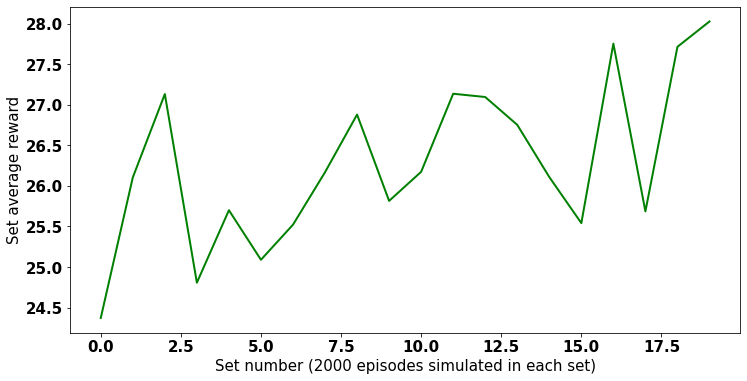

In [20]:
# check your result here (Feel free to modify)
# the result_mc should be a (set_num, )-numpy array that records the average reward of a set of episodes

# put your result here
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)

figure(figsize=(12,6))
ax = subplot(1,1,1)
ax.plot(range(0,set_num), result_mc, linewidth=2, color='g')

plt.ylabel("Set average reward");
plt.xlabel("Set number (2000 episodes simulated in each set)");

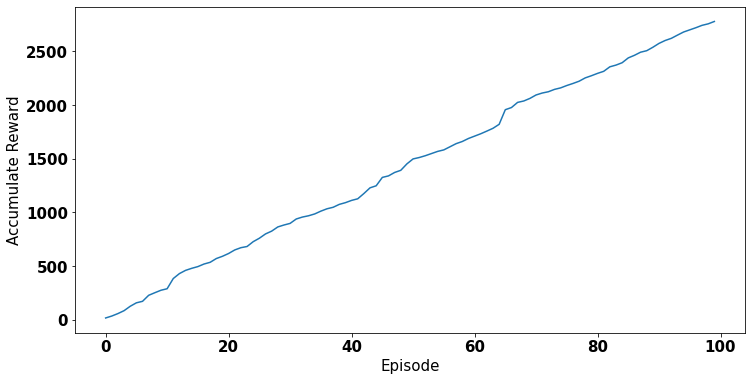

In [23]:
# Use greedy policy of the trained Q function to control the carpole for 100 episode,
# and plot the total reward received in each episode
## Suggested flow (Feel free to modify and add)

env = gym.make('CartPole-v1')

observation = env.reset()
if gym.__version__>'0.26.0':
    observation = observation[0]

count = 0
total_reward_mc = []
total_reward = 0
while 1:

    current_state = dobs.obs2idx(observation)   # discretize the observation space

    action = np.argmax(list_q[current_state])    # choose action by greedy policy of the trained Q

    #################### simulate one step
    if gym.__version__>'0.26.0':
        observation, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
    else:
        observation, reward, done, info = env.step(action)
    ####################

    total_reward += reward

    if done:

        observation = env.reset()
        if gym.__version__>'0.26.0':
            observation = observation[0]

        count +=1

        total_reward_mc.append(total_reward)   # record the total reward until this episode
        # total_reward = 0
        if count==100:
            break

font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)

figure(figsize=(12,6))
ax = subplot(1,1,1)
ax.plot(range(100), total_reward_mc)

plt.ylabel("Accumulate Reward");
plt.xlabel("Episode");
